## Imports et fonctions

# Importation des données

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rfm_total = pd.read_csv("data/rfm_total.csv")
rfm_data = pd.read_csv("data/rfm_data.csv")

### RFM total

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# rfm_total = getRfmNewData('201701', '201808')

num_clusters = 4

encoder = OrdinalEncoder()
rfm_total[["fav_categ", "fav_payment_type"]] = encoder.fit_transform(rfm_total[["fav_categ", "fav_payment_type"]])

# Standarisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(rfm_total.drop(['customer_unique_id', 'period'], axis=1))

kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42)
kmeans.fit(df_scaled)

rfm_total['Cluster'] = kmeans.labels_

rfm_total

,customer_unique_id,period,last_order,frequency,monetary_value,total_dep_by_customer,nb_products_buy,volume_product_cm3,fav_categ,eval_mean_per_customer,nb_of_comment,fav_payment_type,satisfaction_client,recency,Cluster
0,baafa8da2de0fd753a885a5c15b11427,201806,81180.0,1,100.35,100.35,1,7260.0,12.0,5.0,0.0,2.0,1.0,76,1
1,d1588e9ace87e26a010ceb25775113e8,201802,54282.0,1,73.34,73.34,1,46656.0,13.0,4.0,0.0,1.0,1.0,196,1
2,d34394c17a8b789449feefeb97ac0620,201807,90255.0,1,47.54,47.54,1,39600.0,55.0,5.0,0.0,0.0,1.0,31,1
3,9136946b6b16453f79f2dfcef449486e,201706,13935.0,1,53.33,53.33,1,3840.0,45.0,1.0,1.0,1.0,0.0,429,3
4,3105d598604298481a38511105000bdd,201702,2425.0,1,52.68,52.68,1,2816.0,73.0,1.0,1.0,0.0,0.0,549,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96990,69ea433e6a6cb084ec51bacc99b894ea,201710,28090.0,1,211.89,211.89,1,3468.0,67.0,5.0,1.0,1.0,1.0,323,1
96991,a3fcba1358a1a08815de0d6075e633ac,201707,17049.0,1,71.81,71.81,1,4335.0,10.0,5.0,1.0,1.0,1.0,403,1
96992,6b7d9529319d329dfa074692573fb187,201705,8106.0,2,286.30,572.60,2,26136.0,27.0,1.0,2.0,1.0,0.0,481,3
96993,144f10d22f4cf07d962eb1046baf2fad,201806,79452.0,1,91.79,91.79,1,4096.0,55.0,5.0,0.0,1.0,1.0,84,1


### RFM sur le futur

In [6]:
# rfm_data = getRfmNewData('201709', '201808')

encoder = OrdinalEncoder()
rfm_data[["fav_categ", "fav_payment_type"]] = encoder.fit_transform(rfm_data[["fav_categ", "fav_payment_type"]])

# Standarisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(rfm_data.drop(['customer_unique_id', 'period','last_order'], axis=1))

kmeans_data = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42)
kmeans_data.fit(df_scaled)

rfm_data['Cluster'] = kmeans_data.labels_

rfm_data

,customer_unique_id,period,last_order,frequency,monetary_value,total_dep_by_customer,nb_products_buy,volume_product_cm3,fav_categ,eval_mean_per_customer,nb_of_comment,fav_payment_type,satisfaction_client,recency,Cluster
0,80e0239379fad44ae1d70fa7de8de79c,201801,2018-01-31 14:00:11,1,120.09,120.09,1,4096.0,45.0,5.0,0.0,1.0,1.0,212,1
1,d9f4667ea1eaeff6977492eac06ae423,201711,2017-11-24 08:30:58,2,121.70,243.40,2,10240.0,45.0,5.0,0.0,0.0,1.0,280,1
2,77570428461c3b2bcdc9934f069f2692,201802,2018-02-17 08:28:29,2,378.74,757.48,2,16000.0,45.0,5.0,0.0,0.0,1.0,195,1
3,0848b22e9aa5bd18c4eb1d985da46f75,201806,2018-06-16 20:32:14,1,129.86,129.86,1,5415.0,33.0,5.0,1.0,1.0,1.0,76,3
4,c9a8445d06c365da656357b7df9779e0,201801,2018-01-12 13:03:11,1,96.09,96.09,1,2816.0,9.0,5.0,0.0,1.0,1.0,231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74734,20aa7b4baa94b293d91cbcce513f1660,201711,2017-11-25 23:20:36,1,72.15,72.15,1,4851.0,45.0,5.0,1.0,0.0,1.0,279,1
74735,968f6d2f674977d88a4b445a5117ccd8,201806,2018-06-13 11:21:18,1,106.95,106.95,1,9375.0,60.0,5.0,0.0,1.0,1.0,79,3
74736,62b1b62058c7572c90f08ec692ff0533,201806,2018-06-18 08:14:02,5,644.45,3222.25,5,252810.0,67.0,5.0,5.0,0.0,1.0,74,2
74737,6f7ded39d56782a61aaccd529145e7f8,201710,2017-10-05 21:45:24,1,173.62,173.62,1,4212.0,12.0,5.0,1.0,1.0,1.0,330,1


In [7]:
# Obtenir les étiquettes de cluster attribuées par le k-means
cluster_labels = kmeans_data.labels_

# Supposons que vous ayez également un dataframe final avec les étiquettes de cluster réelles
# qui représentent la vérité terrain (ground truth) des clusters
# Vous pouvez le charger dans un dataframe 'ground_truth'

# Calculer l'indice de Rand ajusté entre les clusters prédits et les clusters réels (ground truth)
ari = adjusted_rand_score(rfm_data['Cluster'], cluster_labels)

# Afficher l'indice de Rand ajusté
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 1.0


In [8]:
ari_df = pd.DataFrame(columns=['Period', 'ARI'])

num_clusters = 3

periods = [
    '201701',
    '201702',
    '201703',
    '201704',
    '201705',
    '201706',
    '201707',
    '201708',
]

periods = periods[::-1]

cumulative_df = None

mois = 0

# Pour chaque échantillon temporel, effectuer le clustering et calculer l'ARI
for period in periods:
    # rfm_i =  getRfmNewData(start_period, end_period)
    rfm_i = rfm_total[rfm_total["period"] == period]

    if cumulative_df is None:
        cumulative_df = rfm_data.copy()
    else:
        cumulative_df = pd.concat((cumulative_df, rfm_i), ignore_index=True)


    encoder = OrdinalEncoder()
    cumulative_df[["fav_categ", "fav_payment_type"]] = encoder.fit_transform(cumulative_df[["fav_categ", "fav_payment_type"]])

    # Réduction de la variabilité avec PCA
    # pca = PCA(n_components=4)  # Réduisez le nombre de composantes selon votre besoin
    # train_pca = pca.fit_transform(rfm_i[columns])
    train_pca = cumulative_df.drop(["customer_unique_id", "period",'last_order'], axis=1)

    # Prétraiter les données
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_pca)

    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42)
    kmeans.fit(train_scaled)

    cluster_labels = kmeans.predict(train_scaled)

    # origin_labels = kmeans_origin.predict(cumulative_df)
    # origin_labels = kmeans_all.predict(train_scaled)

    ari = adjusted_rand_score(cumulative_df["Cluster"], cluster_labels)

    # Ajouter l'ARI au DataFrame
    ari_df = pd.concat([ari_df, pd.DataFrame([[mois, ari]], columns=['Period', 'ARI'])], ignore_index=True)

    mois += 1



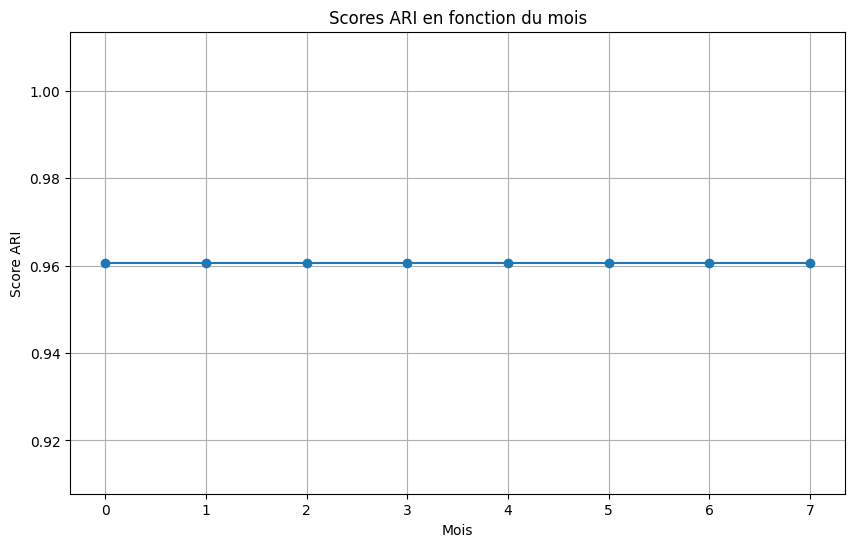

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(ari_df['Period'], ari_df['ARI'], marker='o', linestyle='-')
plt.title('Scores ARI en fonction du mois')
plt.xlabel('Mois')
plt.ylabel('Score ARI')
plt.grid(True)
plt.show()


In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import OrdinalEncoder

num_clusters = 3

# Créez un DataFrame pour stocker les résultats ARI par trimestre
ari_df = pd.DataFrame(columns=['Trimestre', 'ARI'])

# Définissez le nombre de clusters
num_clusters = 3

# Définissez les trimestres
trimestres = [
    ['201701', '201702', '201703'],
    ['201704', '201705', '201706'],
    ['201707', '201708', '201709'],
]

# Initialisez une variable pour suivre le trimestre
trimestre_index = 1

cumulative_df = None

# Boucle à travers les trimestres
for trimestre in trimestres:
    # Créez une liste vide pour stocker les données de chaque mois du trimestre
    trimestre_data = []

    # Boucle à travers les mois du trimestre
    for period in trimestre:
        print('period : ', period)
        print('rfm_total["period"] : ', rfm_total["period"])
        rfm_i = rfm_total[rfm_total["period"] == period]
        print('rfm_i : ', rfm_i)
        if cumulative_df is None:
            cumulative_df = rfm_data.copy()
        else:
            cumulative_df = pd.concat((cumulative_df, rfm_i), ignore_index=True)

        encoder = OrdinalEncoder()
        cumulative_df[["fav_categ", "fav_payment_type"]] = encoder.fit_transform(cumulative_df[["fav_categ", "fav_payment_type"]])

        # Réduction de la variabilité avec PCA
        train_pca = cumulative_df.drop(["customer_unique_id", "period", 'last_order', 'Cluster'], axis=1)

        # Prétraitez les données
        scaler = StandardScaler()
        train_scaled = scaler.fit_transform(train_pca)

        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1, random_state=42)
        kmeans.fit(train_scaled)

        cluster_labels = kmeans.predict(train_scaled)

        ari = adjusted_rand_score(cumulative_df["Cluster"], cluster_labels)

        # Ajoutez l'ARI à la liste des résultats du trimestre
        trimestre_data.append(ari)

    # Calculez la moyenne des ARIs pour ce trimestre
    trimestre_ari_mean = sum(trimestre_data) / len(trimestre_data)

    # Ajoutez le résultat du trimestre au DataFrame
    ari_df = pd.concat([ari_df, pd.DataFrame([[trimestre_index, trimestre_ari_mean]], columns=['Trimestre', 'ARI'])], ignore_index=True)

    trimestre_index += 1

# Affichez les résultats
print(ari_df)


period :  201701
rfm_total["period"] :  0        201806
1        201802
2        201807
3        201706
4        201702
          ...  
96990    201710
96991    201707
96992    201705
96993    201806
96994    201706
Name: period, Length: 96995, dtype: int64
rfm_i :  Empty DataFrame
Columns: [customer_unique_id, period, last_order, frequency, monetary_value, total_dep_by_customer, nb_products_buy, volume_product_cm3, fav_categ, eval_mean_per_customer, nb_of_comment, fav_payment_type, satisfaction_client, recency, Cluster]
Index: []
period :  201702
rfm_total["period"] :  0        201806
1        201802
2        201807
3        201706
4        201702
          ...  
96990    201710
96991    201707
96992    201705
96993    201806
96994    201706
Name: period, Length: 96995, dtype: int64
rfm_i :  Empty DataFrame
Columns: [customer_unique_id, period, last_order, frequency, monetary_value, total_dep_by_customer, nb_products_buy, volume_product_cm3, fav_categ, eval_mean_per_customer, nb_of_co

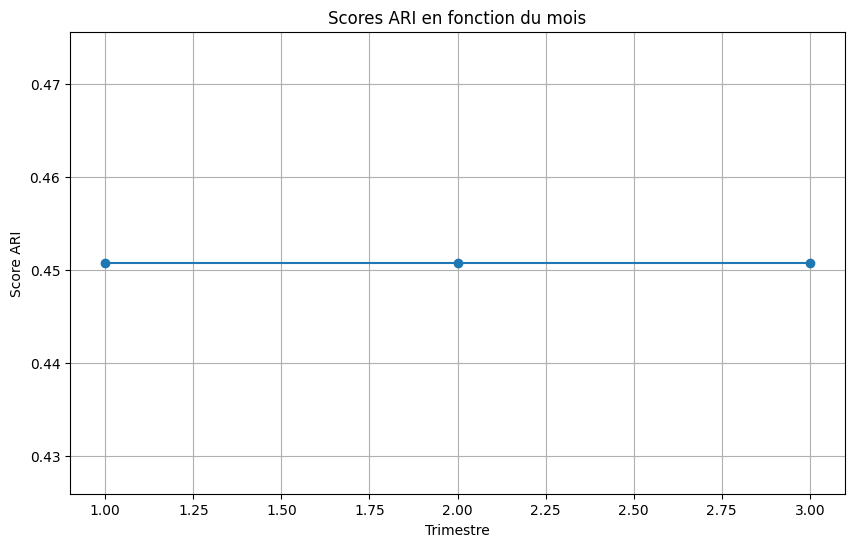

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(ari_df['Trimestre'], ari_df['ARI'], marker='o', linestyle='-')
plt.title('Scores ARI en fonction du mois')
plt.xlabel('Trimestre')
plt.ylabel('Score ARI')
plt.grid(True)
plt.show()

# Fin des blocs à récupérer

In [21]:
from sklearn.metrics import adjusted_rand_score

# Sélectionnez les données de base (2017)
rfm_total['period'] = rfm_total['period'].astype(str)
base_data = rfm_total[rfm_total['period'].str.startswith('2017')]


# base_data = rfm_total[rfm_total['period'].str.startswith('2017')]

# Sélectionnez les données de test (2018)
# test_data = rfm_total[rfm_total['period'].str.startswith('2018')]

rfm_total['period'] = rfm_total['period'].astype(str)
test_data = rfm_total[rfm_total['period'].str.startswith('2018')]

# Boucle à travers les mois (de 1 à 12)
for month in range(1, 13):

    # Créez une chaîne de caractères au format AAAAMM pour la période
    period_str = '2018' + str(month).zfill(2)  # Par exemple, "201801" pour janvier 2018

    # Sélectionnez les données du mois spécifique pour les tests
    monthly_test_data = test_data[test_data['period'] == period_str]

    # Vérifiez si des données sont disponibles pour ce mois
    if not monthly_test_data.empty:
        # Sélectionnez les clusters réels pour le mois
        real_clusters = monthly_test_data['Cluster']

        # Sélectionnez les données d'entraînement pour 2017
        training_data = base_data

        # Appliquez l'algorithme de clustering sur les données d'entraînement
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        training_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

        # Sélectionnez les clusters prédits pour les données de test
        predicted_clusters = kmeans.predict(monthly_test_data[features])

        # Calculez l'ARI pour évaluer la performance du modèle
        ari = adjusted_rand_score(real_clusters, predicted_clusters)

        # Imprimez l'ARI pour ce mois
        print(f'ARI pour {period_str} : {ari}')


NameError: name 'X_scaled' is not defined

In [4]:
rfm_data

,customer_unique_id,period,total_dep_by_customer,nb_products_buy,volume_product_cm3,fav_categ,eval_mean_per_customer,nb_of_comment,fav_payment_type,Cluster
0,69c626d2cbbf48233d66391c9371c482,201807,67.94,1,11109.0,11.0,4.0,1.0,1.0,1
1,48bbe346ca894a3473b715c94323183c,201801,196.01,1,4913.0,67.0,5.0,1.0,1.0,0
2,ed42af950f2aaf3044bca36c95b10247,201710,132.94,1,100000.0,14.0,2.0,1.0,1.0,3
3,36acff9ce2bc2f3456d427eb0200a8aa,201805,54.43,1,208080.0,64.0,5.0,0.0,1.0,0
4,73fb1dc5a70f88c9114dc85bcda21f6c,201805,44.13,1,48749.0,45.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
74734,f295f86eb859ff5fc5d010409a8ffeeb,201808,91.23,1,6400.0,2.0,5.0,0.0,2.0,1
74735,56f7021c161e96a2113ba8d472939709,201806,42.91,1,2816.0,69.0,5.0,0.0,1.0,0
74736,276175229d0061ba2c4e4c6bc1f93d10,201808,274.97,1,36750.0,10.0,1.0,0.0,1.0,3
74737,b573ce2ac3f4286014cef93b3e9c53dc,201709,279.17,1,480200.0,13.0,2.0,1.0,1.0,3


In [5]:
rfm_total

,customer_unique_id,period,last_order,frequency,monetary_value,total_dep_by_customer,nb_products_buy,volume_product_cm3,fav_categ,eval_mean_per_customer,nb_of_comment,fav_payment_type,satisfaction_client,recency,Cluster
0,0209af58dcd97d6ff5bac3f5fdfb8c0e,201808,90829.0,1,119.53,119.53,1,27000.0,55.0,4.0,0.0,1.0,1.0,29,0
1,91fd93ada8ac3dabcc95769d269a5900,201706,11178.0,2,113.38,226.76,2,6656.0,0.0,5.0,0.0,1.0,1.0,455,0
2,30fac3a7d72060742bcbe7b787617343,201802,53136.0,1,278.33,278.33,1,22528.0,30.0,2.0,1.0,1.0,0.0,201,1
3,07c9259c1afcbd1f6b416d9985782083,201702,1292.0,1,1347.96,1347.96,1,7935.0,67.0,5.0,1.0,1.0,1.0,569,0
4,14b24293371e96bdb40f996ad4067cce,201701,442.0,1,114.77,114.77,1,6400.0,63.0,4.0,0.0,0.0,1.0,582,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96990,9a8ad62bc98119f5b94c149c1eb4c971,201711,37924.0,1,162.99,162.99,1,48000.0,14.0,5.0,1.0,1.0,1.0,275,0
96991,1d191e1fe1fbad1c0ff0a65fcb6802bb,201702,1984.0,1,76.05,76.05,1,8712.0,12.0,1.0,1.0,1.0,0.0,558,1
96992,8610d0b6aaf37818de21daf5c7773a79,201802,55424.0,1,78.20,78.20,1,4096.0,60.0,2.0,1.0,1.0,0.0,191,1
96993,7b03054b90e1c46360273803ece62706,201808,91059.0,1,264.08,264.08,1,42875.0,63.0,5.0,1.0,1.0,1.0,28,0


In [20]:
rfm_total.dtypes

customer_unique_id         object
period                      int64
last_order                float64
frequency                   int64
monetary_value            float64
total_dep_by_customer     float64
nb_products_buy             int64
volume_product_cm3        float64
fav_categ                 float64
eval_mean_per_customer    float64
nb_of_comment             float64
fav_payment_type          float64
satisfaction_client       float64
recency                     int64
Cluster                     int32
dtype: object

month :  1
period_str :  201801
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801
          ...  
40760    201803
17102    201805
24308    201806
96246    201803
16496    201803
Name: period, Length: 41063, dtype: object


C:\Users\Zbook\AppData\Local\Temp\ipykernel_19168\3207616446.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


month :  2
period_str :  201802
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801
          ...  
40760    201803
17102    201805
24308    201806
96246    201803
16496    201803
Name: period, Length: 41063, dtype: object


C:\Users\Zbook\AppData\Local\Temp\ipykernel_19168\3207616446.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


month :  3
period_str :  201803
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801
          ...  
40760    201803
17102    201805
24308    201806
96246    201803
16496    201803
Name: period, Length: 41063, dtype: object


C:\Users\Zbook\AppData\Local\Temp\ipykernel_19168\3207616446.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


month :  4
period_str :  201804
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801
          ...  
40760    201803
17102    201805
24308    201806
96246    201803
16496    201803
Name: period, Length: 41063, dtype: object


C:\Users\Zbook\AppData\Local\Temp\ipykernel_19168\3207616446.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


month :  5
period_str :  201805
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801
          ...  
40760    201803
17102    201805
24308    201806
96246    201803
16496    201803
Name: period, Length: 41063, dtype: object


C:\Users\Zbook\AppData\Local\Temp\ipykernel_19168\3207616446.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


month :  6
period_str :  201806
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801
          ...  
40760    201803
17102    201805
24308    201806
96246    201803
16496    201803
Name: period, Length: 41063, dtype: object


C:\Users\Zbook\AppData\Local\Temp\ipykernel_19168\3207616446.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


month :  7
period_str :  201807
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801
          ...  
40760    201803
17102    201805
24308    201806
96246    201803
16496    201803
Name: period, Length: 41063, dtype: object


C:\Users\Zbook\AppData\Local\Temp\ipykernel_19168\3207616446.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


month :  8
period_str :  201808
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801
          ...  
40760    201803
17102    201805
24308    201806
96246    201803
16496    201803
Name: period, Length: 41063, dtype: object


C:\Users\Zbook\AppData\Local\Temp\ipykernel_19168\3207616446.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


month :  9
period_str :  201809
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801
          ...  
40760    201803
17102    201805
24308    201806
96246    201803
16496    201803
Name: period, Length: 41063, dtype: object
month est vide 
month :  10
period_str :  201810
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801
          ...  
40760    201803
17102    201805
24308    201806
96246    201803
16496    201803
Name: period, Length: 41063, dtype: object
month est vide 
month :  11
period_str :  201811
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801
          ...  
40760    201803
17102    201805
24308    201806
96246    201803
16496    201803
Name: period, Length: 41063, dtype: object
month est vide 
month :  12
period_str :  201812
test_data[period] :  15458    201803
16263    201803
77362    201802
15497    201804
59533    201801


ValueError: x and y must have same first dimension, but have shapes (12,) and (8,)

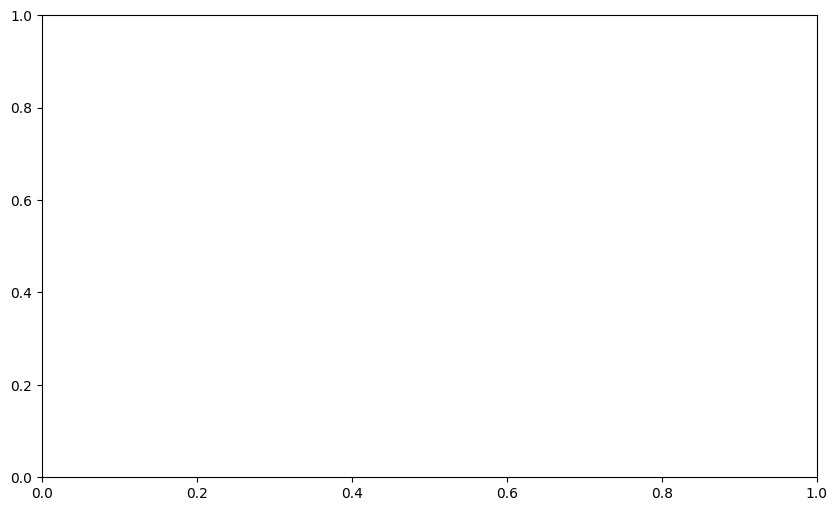

In [25]:
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

# Préparez vos données (Assurez-vous d'avoir correctement préparé vos données auparavant)
# Sélectionnez les données de base (2017)
rfm_total['period'] = rfm_total['period'].astype(str)
base_data = rfm_total[rfm_total['period'].str.startswith('2017')]

# base_data = rfm_total[rfm_total['period'].str.startswith('2017')]

# Sélectionnez les données de test (2018)

rfm_total['period'] = rfm_total['period'].astype(str)
test_data = rfm_total[rfm_total['period'].str.startswith('2018')]

# Créez X en sélectionnant les fonctionnalités pertinentes pour la segmentation
features = ['recency', 'frequency', 'monetary_value']
X = base_data[features]

# Normalisez les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Créez une liste pour stocker les valeurs d'ARI
ari_values = []

# Boucle à travers les mois (de 1 à 12)
for month in range(1, 13):
    print('month : ', month)
    
    # Créez une chaîne de caractères au format AAAAMM pour la période
    period_str = '2018' + str(month).zfill(2)  # Par exemple, "201801" pour janvier 2018
    print('period_str : ', period_str)
    print('test_data[period] : ', test_data['period'])    
    # Sélectionnez les données du mois spécifique pour les tests
    monthly_test_data = test_data[test_data['period'] == period_str]
#     print('monthly_test_data : ', monthly_test_data)
    # Vérifiez si des données sont disponibles pour ce mois
    if monthly_test_data.empty:
        print('month est vide ')    
    
    if not monthly_test_data.empty:
        # Sélectionnez les clusters réels pour le mois
        real_clusters = monthly_test_data['Cluster']

        # Sélectionnez les données d'entraînement pour 2017
        training_data = base_data

        # Appliquez l'algorithme de clustering sur les données d'entraînement
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        training_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

        # Sélectionnez les clusters prédits pour les données de test
        predicted_clusters = kmeans.predict(monthly_test_data[features])

        # Calculez l'ARI pour évaluer la performance du modèle
        ari = adjusted_rand_score(real_clusters, predicted_clusters)

        # Ajoutez l'ARI à la liste
        ari_values.append(ari)

# Affichez la courbe ARI pour l'année 2018
import matplotlib.pyplot as plt

# Créez une liste de mois (de 1 à 12)
months = list(range(1, 13))

# Tracez la courbe ARI
plt.figure(figsize=(10, 6))
plt.plot(months, ari_values, marker='o', linestyle='-', color='b')
plt.title("ARI pour chaque mois en 2018")
plt.xlabel("Mois")
plt.ylabel("ARI")
plt.xticks(months)
plt.grid(True)
plt.show()


In [36]:
rfm_total["period"] 

0        201806
1        201802
2        201807
3        201706
4        201702
          ...  
96990    201710
96991    201707
96992    201705
96993    201806
96994    201706
Name: period, Length: 96995, dtype: int64

In [42]:
rfm_total["period"].unique()

array([201806, 201802, 201807, 201706, 201702, 201708, 201805, 201803,
       201804, 201801, 201808, 201709, 201710, 201712, 201711, 201707,
       201703, 201701, 201704, 201705], dtype=int64)